In [1]:
import csv
import numpy as np
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt

In [2]:
filename = 'data/bike_day.csv'
file_reader = csv.reader(open(filename, 'r'), delimiter = ',')
x, y = [],[]
# 先不放入 14、15 列
for row in file_reader:
    x.append(row[2:13])
    y.append(row[-1])

In [3]:
# 提取特征名称
feature_names = np.array(x[0])
# 将第一行特征名称移除，只保留数值
x = np.array(x[1:]).astype(np.float32)
y = np.array(y[1:]).astype(np.float32)

In [4]:
# 打乱数据
shuffle(x,y, random_state=7)

[array([[ 4.       ,  1.       , 12.       , ...,  0.390146 ,  0.905417 ,
          0.157975 ],
        [ 4.       ,  1.       , 11.       , ...,  0.281558 ,  0.786667 ,
          0.237562 ],
        [ 3.       ,  1.       ,  9.       , ...,  0.563125 ,  0.57     ,
          0.0901833],
        ...,
        [ 3.       ,  1.       ,  6.       , ...,  0.752542 ,  0.567917 ,
          0.118787 ],
        [ 3.       ,  0.       ,  7.       , ...,  0.638263 ,  0.585    ,
          0.208342 ],
        [ 3.       ,  0.       ,  6.       , ...,  0.643313 ,  0.483333 ,
          0.209571 ]], dtype=float32),
 array([3228., 3959., 7333., 4068., 3613., 4575., 4669., 3523., 6786.,
        6273., 5115., 6235., 5119., 7282., 4570., 3095., 3624., 7852.,
        6536., 5566., 3750., 7424., 2311., 1795., 2294., 5585., 5847.,
        8294., 7446., 4086., 6660., 5225., 8362., 3214., 1685., 5409.,
        2729., 5847., 1708., 6359., 1917., 3786., 4333., 3333., 1495.,
        1321., 6073., 5058., 7494., 240

In [5]:
num_training = int(0.9 * len(x))
x_train, y_train = x[:num_training], y[:num_training]
x_test, y_test = x[num_training:], y[num_training:]

In [6]:
# 参数 n_estimators 是指评估器的数量，表示随机森林需要使用的决策树数量
# 参数 max_depth 是指决策树的最大深度
# 参数 min_samples_split 是指决策树分裂一个节点需要用到的最小数据样板量
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [7]:
# 评估随机森林回归器的训练效果
y_pred = rf_regressor.predict(x_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Random Forest regressor performance ####
Mean squared error = 1326923.02
Explained variance score = 0.61


In [9]:
RFFImp = rf_regressor.feature_importances_
RFFImp = 100 * (RFFImp / max(RFFImp))
index_scored = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_scored.shape[0]) + 0.5

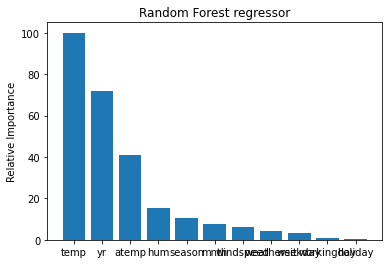

In [10]:
plt.figure()
plt.bar(pos, RFFImp[index_scored], align='center')
plt.xticks(pos, feature_names[index_scored])
plt.ylabel('Relative Importance')
plt.title('Random Forest regressor')
plt.show()